# Statistical Testing 1

**Population**, in this context, refers to the **complete** set of the target population, whereas a **sample** refers to a randomly selected sub-set from the population. As it can be understood, the sample may or may not representative of the population with respect to certain characteristcs.

Following **parameters** represent the population:

* $\mu$ population mean
* $\sigma^2$ population variance
* $\sigma$ population standard deviation

Following **statistics** represent the sample:

* $\bar{x}$ sample mean
* $s^2$ sample variance
* $s$ sample standard deviation

Standard Error (SE) is the the variance of the sample mean $\bar{x}$: 

$$\sigma_{\bar{x}}^2 = \dfrac{\sigma^2}{n} \rightarrow \sigma_{\bar{x}} = \dfrac{\sigma}{\sqrt{n}}$$

As it can be understood, when we are approximating the sample mean $\bar{x}$, the larger our sample size $n$ is, the better our estimate is. Or in other words, as the number of samples used for calculating the sample mean increases, the smaller $\sigma_{\bar{x}}^2$ gets.


## Hypothesis Testing

> The null hypothesis and the alternative hypothesis are types of conjectures used in statistical tests, which are formal methods of reaching conclusions or making decisions on the basis of data. The hypotheses are conjectures about a statistical model of the population, which are based on a sample of the population.

Source [Wikipedia](https://en.wikipedia.org/wiki/Null_hypothesis)

In other words, hypothesis testing evaluates two mutually exclusive statements about a population.

* **Null Hypothesis**, $H_0$
  * Null hypothesis, $H_0$, is a statement saying that no difference or relationship exists between two sets of data or variables being analyzed. The null hypothesis claims that any experimentally observed difference is due to chance alone, and an underlying causative relationship does not exist.
* **Alternate Hypothesis**, $H_a$
  * Alternate hypothesis, $H_a$, the statement that is being tested against the null hypothesis, claims that a relationship does exist between two variables.

Critical region in the region of values that corresponds to the rejection of the null hypothesis at some chosen probability level. The critical region is marked using red color in the following figure.

![Hypothesis testing](resources/hypothesis_testing.png)
Source [towardsdatascience.com](https://towardsdatascience.com/everything-you-need-to-know-about-hypothesis-testing-part-i-4de9abebbc8a)

## P-Value

The $p$-value is used to determine statistical significance of a hypothesis test. The $p$-value evaluates how well the sample data supports the argument that the null hypothesis is true.

> In null-hypothesis significance testing, the $p$-value is the probability of obtaining a test result as extreme as the result actually observed, under the assumption that the null hypothesis is correct. A very small $p$-value means that such an extreme observed outcome would be very unlikely under the null hypothesis.

> The lower the p-value is, the lower the probability of getting that result if the null hypothesis were true.

Source [Wikipedia](https://en.wikipedia.org/wiki/P-value)

In [1]:
from scipy.stats import jarque_bera, normaltest, norm, probplot, kstest, t, ttest_1samp
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Download the S&P500 data from Kaggle
od.download("https://www.kaggle.com/datasets/camnugent/sandp500/download?datasetVersionNumber=4")
data = pd.read_csv('./sandp500/all_stocks_5yr.csv', parse_dates=True)
data.head()

Skipping, found downloaded files in "./sandp500" (use force=True to force download)


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
# Calculate returns for Starbucks
sbux = data[data['Name'] == 'SBUX']
sbux.insert(len(sbux.columns), 'return', sbux['close'].pct_change(1))
sbux.insert(len(sbux.columns), 'log return', np.log(sbux['return'] + 1.0))
sbux.head()

,date,open,high,low,close,volume,Name,return,log return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,-0.004080,-0.004089
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,0.002138,0.002135
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,-0.007643,-0.007672
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,-0.005015,-0.005028


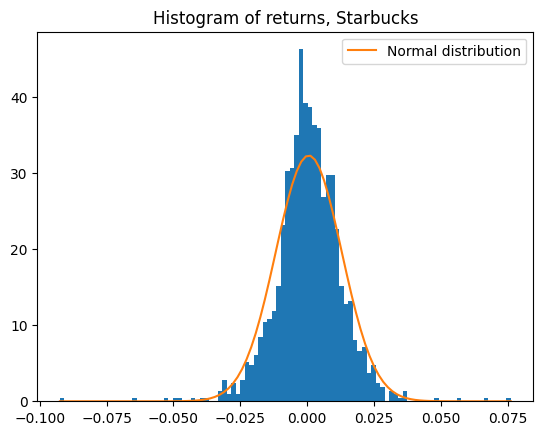

In [4]:
# Plot the histogram of returns, and corresponding normal distribution, for Starbucks' returns
x = np.linspace(sbux['return'].min(), sbux['return'].max(), 100)
y = norm.pdf(x, loc=sbux['return'].mean(), scale=sbux['return'].std())

plt.hist(sbux['return'].dropna().to_numpy(), bins=100, density=True)
plt.plot(x, y, label='Normal distribution')
plt.title('Histogram of returns, Starbucks')
plt.legend()
plt.show()

## Normal Distribution Testing

The **Jarque-Bera** test tests whether the sample data has the **skewness** and **kurtosis** matching a normal distribution. The null hypothesis is a joint hypothesis of the skewness being zero and the excess kurtosis being zero. The test statistic is always nonnegative. If it is far from zero, it signals that the data do not have a normal distribution. The $p$-value reflects the probability of accepting the null hypothesis.

In [5]:
# Jarque-Bera test using returns
# We reject the null hypothesis since 0.0 < 0.05
jarque_bera(sbux['return'].dropna())

SignificanceResult(statistic=1639.028438655224, pvalue=0.0)

The **normaltest** tests whether a sample differs from a normal distribution. The null hypothesis is that the sample comes from a normal distribution. 

In [6]:
# Normaltest using returns
normaltest(sbux['return'].dropna())

NormaltestResult(statistic=172.6819672061636, pvalue=3.1811727900119636e-38)

In [7]:
# Jarque-Bera test using log-returns
# We reject the null hypothesis since 0.0 < 0.05
jarque_bera(sbux['log return'].dropna())

SignificanceResult(statistic=1882.1814629047703, pvalue=0.0)

In [8]:
# Normaltest using log-returns
normaltest(sbux['log return'].dropna())

NormaltestResult(statistic=198.54738937007733, pvalue=7.690989175882069e-44)

## Kolmogorov-Smirnov Testing

Kolmogorov-Smirnov performs either one- or two-sample test for goodness of fit.

* The one-sample test compares the underlying distribution F(x) of a sample against a given distribution G(X)
* The two-sample test compares the underlying distributions of two independent samples

There are three options for the null and corresponding alternative hypothesis that can be selected using the alternative parameter.

* two-sided: The null hypothesis is that the two distributions are identical, F(x)=G(x) for all x; the alternative is that they are not identical.
* less: The null hypothesis is that F(x) >= G(x) for all x; the alternative is that F(x) < G(x) for at least one x.
* greater: The null hypothesis is that F(x) <= G(x) for all x; the alternative is that F(x) > G(x) for at least one x.

Note that the alternative hypotheses describe the CDFs of the underlying distributions, not the observed values. For example, suppose x1 ~ F and x2 ~ G. If F(x) > G(x) for all x, the values in x1 tend to be less than those in x2.

In [9]:
# Now that we're pretty convinced that the returns are not from a normal distribution,
# let's try if t-distribution (Student's distribution) is a better fit
df, loc, scale = t.fit(sbux['return'].dropna())
def cdf(x):
    return t.cdf(x, df, loc, scale)

In [10]:
# We fail to reject the null hypothesis since 0.75 > 0.05 and therefore conclude that
# the sample is from t-distribution.
kstest(sbux['return'].dropna(), cdf)

KstestResult(statistic=0.01887566203844726, pvalue=0.7537785475444063, statistic_location=-0.0003257859586252021, statistic_sign=1)

In [11]:
df, loc, scale = t.fit(sbux['log return'].dropna())
def cdf(x):
    return t.cdf(x, df, loc, scale)

In [12]:
# We fail to reject the null hypothesis since 0.78 > 0.05 and therefore conclude that
# the sample is from a t-distribution.
kstest(sbux['log return'].dropna(), cdf)

KstestResult(statistic=0.01837990941957013, pvalue=0.7818301159274575, statistic_location=-0.0003258390383993639, statistic_sign=1)

## One-Sample t-Test

This is a test for the null hypothesis that the expected value (mean) of a sample of given independent observations is equal to the given population mean. We're not testing if values are from a distribution, but how the data compares to some given value.

In [47]:
# Calculating critical value for t-test. For a two-sided test, the significance level is 1 - alpha/2
cv = t.ppf(q=1-0.05/2, df = len(sbux['return'].dropna())-1)
print(f'Critical value +/-: {cv}')

Critical value +/-: 1.9618530205569116


In [25]:
# Null hypothesis: returns of Starbucks are from a distribution with a mean of 0
# 0.085 > 0.05 => we fail to reject the null hypothesis
ttest_1samp(sbux['return'].dropna(), popmean=0)

TtestResult(statistic=1.7223010261810556, pvalue=0.08526098717694539, df=1257)

In [26]:
# Null hypothesis: log returns of Starbucks are from a distribution with a mean of 0
ttest_1samp(sbux['log return'].dropna(), popmean=0)

TtestResult(statistic=1.4999195047533647, pvalue=0.13388636615667793, df=1257)

### Calculate T-test for the Mean of Returns for 3M

In [16]:
mmm = data[data['Name'] == 'MMM'].copy()
mmm.head()

,date,open,high,low,close,volume,Name
380126,2013-02-08,102.34,103.330,102.0400,102.66,1937721,MMM
380127,2013-02-11,102.39,102.880,102.0401,102.62,1715444,MMM
380128,2013-02-12,102.66,103.590,102.6300,103.46,1927930,MMM
380129,2013-02-13,103.03,103.395,102.5800,102.86,1699804,MMM
380130,2013-02-14,102.43,103.140,102.2200,102.78,2217419,MMM


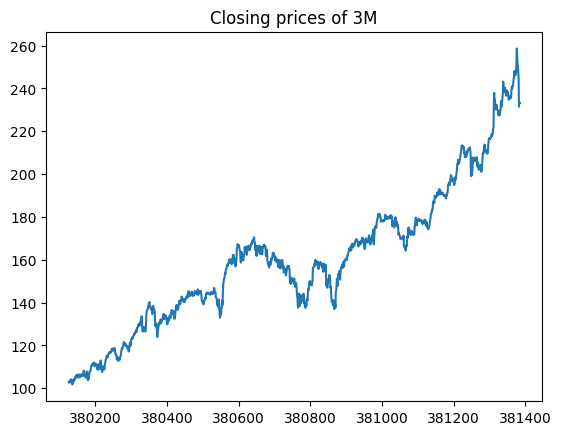

In [17]:
mmm['close'].plot(title='Closing prices of 3M');

In [18]:
mmm['return'] = mmm['close'].pct_change(1)
mmm['log return'] = np.log(mmm['return'] + 1)
mmm.head()

,date,open,high,low,close,volume,Name,return,log return
380126,2013-02-08,102.34,103.330,102.0400,102.66,1937721,MMM,NaN,NaN
380127,2013-02-11,102.39,102.880,102.0401,102.62,1715444,MMM,-0.000390,-0.000390
380128,2013-02-12,102.66,103.590,102.6300,103.46,1927930,MMM,0.008186,0.008152
380129,2013-02-13,103.03,103.395,102.5800,102.86,1699804,MMM,-0.005799,-0.005816
380130,2013-02-14,102.43,103.140,102.2200,102.78,2217419,MMM,-0.000778,-0.000778


In [19]:
mmm['return'].mean(), mmm['return'].std()

(0.0007001182500580143, 0.009768718404053094)

In [20]:
m = mmm['return'].mean()
s = mmm['return'].std(ddof=1)
low = m - 1.96 * s / np.sqrt(len(mmm['return']))
high = m + 1.96 * s / np.sqrt(len(mmm['return']))
print(f'mean: {m}')
print(f'std: {s}')
print(f'Confidence interval (returns), low limit: {low}')
print(f'Confidence interval (returns), high limit: {high}')

mean: 0.0007001182500580143
std: 0.009768718404053094
Confidence interval (returns), low limit: 0.0001605072466054154
Confidence interval (returns), high limit: 0.0012397292535106133


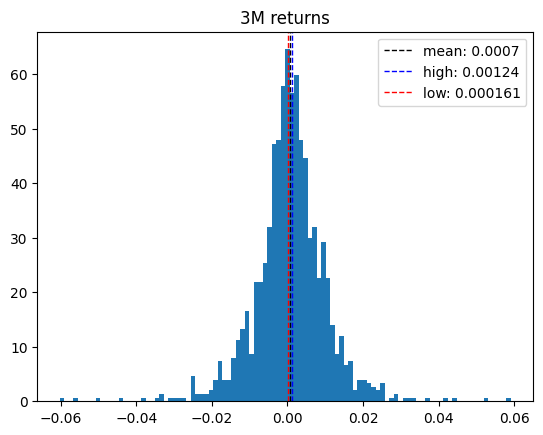

In [21]:
plt.hist(mmm['return'].dropna(), bins=100, density=True)
plt.axvline(m, color='k', linestyle='dashed', linewidth=1, label=f'mean: {m:0.3}')
plt.axvline(high, color='b', linestyle='dashed', linewidth=1, label=f'high: {high:0.3}')
plt.axvline(low, color='r', linestyle='dashed', linewidth=1, label=f'low: {low:0.3}')
plt.title('3M returns')
plt.legend()
plt.show()

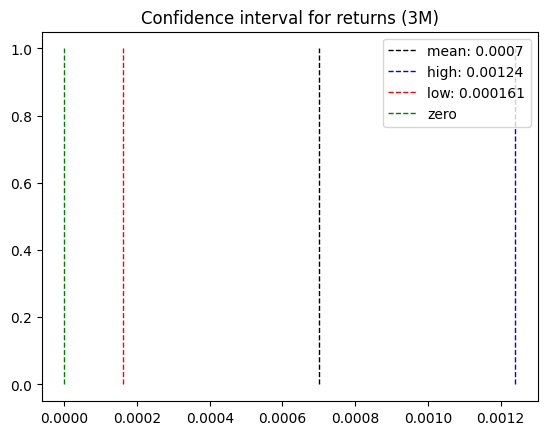

In [22]:
plt.vlines(m, ymin=0, ymax= 1, color='k', linestyle='dashed', linewidth=1, label=f'mean: {m:0.3}')
plt.vlines(high, ymin=0, ymax= 1, color='b', linestyle='dashed', linewidth=1, label=f'high: {high:0.3}')
plt.vlines(low, ymin=0, ymax= 1, color='r', linestyle='dashed', linewidth=1, label=f'low: {low:0.3}')
plt.vlines(0, ymin=0, ymax= 1, color='g', linestyle='dashed', linewidth=1, label=f'zero')
plt.legend()
plt.title('Confidence interval for returns (3M)')
plt.show()

In [48]:
# Calculate critical values for two-sided test. Values outside of the critical
# areas mean that the null hypothesis should be rejected.
cv = t.ppf(q=1-0.05/2, df = len(mmm['return'].dropna())-1)
print(f'Critical value +/-: {cv}')

Critical value +/-: 1.9618530205569116


In [23]:
# Null hypothesis: returns are from a probability distribution with 0 mean
# 0.01 < 0.05 => we reject the null hypothesis
ttest_1samp(mmm['return'].dropna(), 0)

TtestResult(statistic=2.541991701703365, pvalue=0.011141496531324404, df=1257)

In [24]:
# Null hypothesis: log returns are from a probability distribution with 0 mean
# We reject the null hypothesis due to the p-value being small
ttest_1samp(mmm['log return'].dropna(), 0)

TtestResult(statistic=2.365963115873947, pvalue=0.018134246809755054, df=1257)